In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import json
import datetime
from pprint import pprint
%matplotlib inline

In [3]:
# build mementos on FP7 program online

max_year = '2013'
min_year = '2007'

timemaps_structure = {}

for timemap_file in os.listdir('./mementos_all_with_url'):           
    with open('./mementos_all_with_url/' + timemap_file) as timemap:    
        timemap_json = json.load(timemap)                            
        original_uri = timemap_json['original_uri']        
        if timemap_json.get('mementos',0) != 0:
            all_mementos = timemap_json['mementos']['list']         
            accepted_mementos = []
            for memento in all_mementos:                
                date_string = memento['datetime']                
                date = datetime.datetime.strptime(date_string, "%Y-%m-%dT%H:%M:%S%fZ")
                if (int(date.year) >= int(min_year) and int(date.year) <= int(max_year)):
                    accepted_mementos.append(memento)        
            timemaps_structure[original_uri] = accepted_mementos

In [4]:
original_uri

u'http://www.gmes-graal.eu/'

In [5]:
iterator = timemaps_structure.iteritems()
count = 0
for uri,mementos in iterator:    
    if mementos != []:        
        count += 1        
print "Number of URIs with a version archived: %s" % count            

Number of URIs with a version archived: 1593


In [7]:
# Mementos frequency distribution
timemaps_frequency = {}

iterator = timemaps_structure.iteritems()
count = 0
for uri,mementos in iterator:    
    if mementos != []:
        timemaps_frequency[uri] = len(mementos)
#print "Number of URIs without any version archived: %s" % count 

(array([ 195.,    0.,    0.,    0.,    0.,    0.,  195.,    0.,    0.,
           0.,    0.,    0.,  183.,    0.,    0.,    0.,    0.,    0.,
         138.,    0.,    0.,    0.,    0.,    0.,  145.,    0.,    0.,
           0.,    0.,    0.,   99.,    0.,    0.,    0.,    0.,    0.,
          90.,    0.,    0.,    0.,    0.,    0.,   74.,    0.,    0.,
           0.,    0.,    0.,   69.,    0.,    0.,    0.,    0.,    0.,
          48.,    0.,    0.,    0.,    0.,    0.,   42.,    0.,    0.,
           0.,    0.,    0.,   32.,    0.,    0.,    0.,    0.,    0.,
          26.,    0.,    0.,    0.,    0.,    0.,   25.,    0.,    0.,
           0.,    0.,    0.,   20.,    0.,    0.,    0.,    0.,    0.,
          19.,    0.,    0.,    0.,    0.,    0.,   20.,    0.,    0.,
           0.,    0.,    0.,    0.,   14.,    0.,    0.,    0.,    0.,
           0.,   12.,    0.,    0.,    0.,    0.,    0.,   10.,    0.,
           0.,    0.,    0.,    0.,    8.,    0.,    0.,    0.,    0.,
      

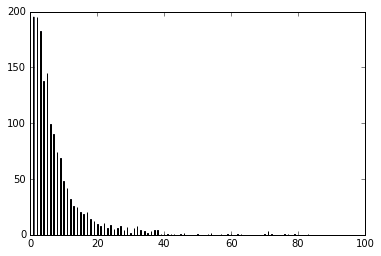

In [8]:
# max(timemaps_frequency, key=timemaps_frequency.get)
# timemaps_frequency['http://eurospin.mpg.de/']

plt.hist(timemaps_frequency.values(),600,range=[1, 100])

In [9]:
from urlparse import urlparse
import re

domains = []

iterator = timemaps_structure.iteritems()
domains_not_archived = []
domains_archived = []
for uri,mementos in iterator:    
    if mementos == []:
        url = urlparse(uri)
        url_parsed = url.netloc.split('.')
        domains_not_archived.append(url_parsed[len(url_parsed) - 1])
    else:
        url = urlparse(uri)
        url_parsed = url.netloc.split('.')
        domains_archived.append(url_parsed[len(url_parsed) - 1])
#print "Number of URIs without any version archived: %s" % count 

In [10]:
from collections import Counter
counter_not_archived = Counter(domains_not_archived)
counter_archived = Counter(domains_archived)

In [11]:
counter_not_archived

Counter({u'com': 6,
         u'de': 2,
         u'edu': 1,
         u'es': 2,
         u'eu': 155,
         u'fi': 4,
         u'il': 1,
         u'it': 5,
         u'net': 3,
         u'nl': 1,
         u'org': 10,
         u'pt': 1,
         u'se': 3,
         u'uk': 4})

In [12]:
counter_archived

Counter({u'aero': 1,
         u'at': 6,
         u'be': 12,
         u'br': 1,
         u'cat': 1,
         u'ch': 6,
         u'co': 1,
         u'com': 122,
         u'cz': 1,
         u'de': 28,
         u'dk': 7,
         u'edu': 2,
         u'ee': 2,
         u'es': 9,
         u'eu': 1061,
         u'fi': 14,
         u'fr': 13,
         u'gr': 8,
         u'hu': 2,
         u'ie': 2,
         u'il': 1,
         u'in': 1,
         u'info': 16,
         u'is': 2,
         u'it': 9,
         u'lt': 1,
         u'net': 40,
         u'nl': 7,
         u'no': 9,
         u'nu': 1,
         u'nz': 1,
         u'org': 155,
         u'pl': 3,
         u'pt': 3,
         u'ro': 1,
         u'se': 8,
         u'si': 1,
         u'uk': 34,
         u'za': 1})

In [13]:
counter_not_archived['eu'] / 178.

0.8707865168539326

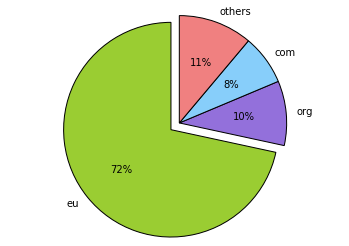

In [14]:
total_counter = counter_not_archived + counter_archived
total_counter

labels = 'eu', 'org', 'com','others'
sizes = [total_counter['eu'], total_counter['org'], total_counter['com'],106+26+28+29]
colors = ['yellowgreen', 'mediumpurple', 'lightskyblue', 'lightcoral']

plt.pie(sizes,labels=labels,explode = (0.1,0,0,0),startangle=90,autopct='%1.f%%', colors = colors)
plt.axis('equal')
plt.savefig('domain_distribution.pdf', format='pdf', dpi=1200, bbox_inches='tight')

# Web Archives Distribution

In [15]:
# Mementos frequency distribution
list_mementos = []

iterator = timemaps_structure.iteritems()
count = 0
for uri,mementos in iterator:    
    if mementos != []:
        for m in mementos:
            list_mementos.append(m)
#print "Number of URIs without any version archived: %s" % count 

In [16]:
web_archives = []
for memento in list_mementos:
    web_archives.append(memento['uri'].split('/')[2])

web_archives_distribution = Counter(web_archives)    

In [17]:
web_archives_distribution

Counter({u'arquivo.pt': 28,
         u'collection.europarchive.org': 1,
         u'wayback.archive-it.org': 185,
         u'wayback.vefsafn.is': 198,
         u'web.archive.bibalex.org:80': 91,
         u'web.archive.org': 14016,
         u'webarchive.loc.gov': 362,
         u'webarchive.nationalarchives.gov.uk': 33,
         u'webarchive.parliament.uk': 5,
         u'www.padi.cat:8080': 2,
         u'www.webarchive.org.uk:80': 16})

In [18]:
len(list_mementos)

14937

([<matplotlib.axis.XTick at 0x7f9fe352a5d0>,
 <a list of 11 Text xticklabel objects>)

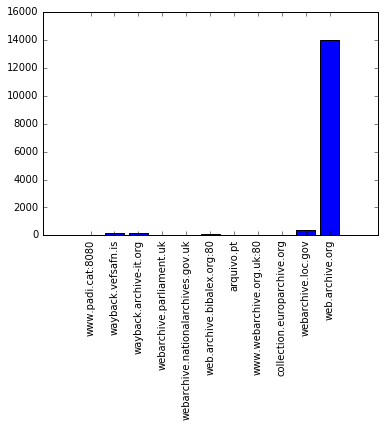

In [19]:
plt.bar(range(len(web_archives_distribution)), web_archives_distribution.values(), align='center',)
plt.xticks(range(len(web_archives_distribution)), web_archives_distribution.keys(),  rotation='vertical')

In [20]:
9032/9961.

0.9067362714586888

# Arquivo.pt Mementos Identification

In [21]:
for memento in list_mementos:
    if memento['uri'].split('/')[2] == "arquivo.pt":
        print memento['uri']

http://arquivo.pt/wayback/20110704230527/http://www.euronanoforum2011.eu/
http://arquivo.pt/wayback/20120125234056/http://www.euronanoforum2011.eu/
http://arquivo.pt/wayback/20131107072213/http://www.euronanoforum2011.eu/
http://arquivo.pt/wayback/20110524152427/http://www.marina-platform.info/index.aspx
http://arquivo.pt/wayback/20110704010653/http://www.marina-platform.info/index.aspx
http://arquivo.pt/wayback/20120124101713/http://www.marina-platform.info/index.aspx
http://arquivo.pt/wayback/20110704212713/http://www.eusc.europa.eu/index.php?option=com_content&task=view&id=60&Itemid=84
http://arquivo.pt/wayback/20120125212735/http://www.eusc.europa.eu/index.php?option=com_content&task=view&id=60&Itemid=84
http://arquivo.pt/wayback/20110527110224/http://www.poco-project.org/
http://arquivo.pt/wayback/20110708210740/http://www.gmes-geoland.info/
http://arquivo.pt/wayback/20120130064245/http://www.gmes-geoland.info/
http://arquivo.pt/wayback/20120129043043/http://www.ita.es/ita
http://

# FP7 Archvived versions location distribution

In [6]:
iterator = timemaps_structure.iteritems()
count = 0
rows_list = []
for uri,mementos in iterator: 
    if mementos != []:
        dictrow = {}    
        dictrow['URI-O'] = uri
        for m in mementos:        
            dictrow[m['uri'].split('/')[2]] = 1
        rows_list.append(dictrow)        

In [7]:
df = pd.DataFrame(rows_list)
df.count()

URI-O                                 1593
arquivo.pt                              14
collection.europarchive.org              1
wayback.archive-it.org                  17
wayback.vefsafn.is                       5
web.archive.bibalex.org:80              15
web.archive.org                       1589
webarchive.loc.gov                       9
webarchive.nationalarchives.gov.uk      12
webarchive.parliament.uk                 4
www.padi.cat:8080                        1
www.webarchive.org.uk:80                 4
dtype: int64

In [8]:
df = pd.DataFrame(rows_list)
df.count() / 2092 * 100

URI-O                                 76.147228
arquivo.pt                             0.669216
collection.europarchive.org            0.047801
wayback.archive-it.org                 0.812620
wayback.vefsafn.is                     0.239006
web.archive.bibalex.org:80             0.717017
web.archive.org                       75.956023
webarchive.loc.gov                     0.430210
webarchive.nationalarchives.gov.uk     0.573614
webarchive.parliament.uk               0.191205
www.padi.cat:8080                      0.047801
www.webarchive.org.uk:80               0.191205
dtype: float64